# Midterm Data Science 2000
## Student ID: xxxxxx
## General comments
The open-book Midterm tests for knowledge and skills acquired in the first half of the semester, especially in the first 6 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the midterm. You are not allowed to use ChatGPT, co-pilot or any other similar AI.

In VScode, you need to have the CoPilot and CoPilot extension **uninstalled** before starting the midterm.
In Google Collab you need to go to settings to disable the AI functionality. See last announcement for details.

**If you get caught with AI completion installed (even if it seems disabled at this point), it will be reported as academic dishonesty.**

You need to submit the midterm by the due date (12:20) on OWL under Midterm_OpenBook. Late submission will be scored with 0 pts, unless you have received extra accommodation. So please start your submission five minutes before the deadline!  

### Additional Guidance
The midterm is supposed to be challenging. If you get stuck on a particular question because you can't solve a programming problem, just write down in text *how* you would try to solve the problem - if correct, this can give you partial points. Then continue the next question.
If you need the solution from a previous problem, just *assume* some outcome and answer the question under that assumption. If you do this, make your assumptions explicit.

Read all the questions carefully. Most questions demands a written answer as part of it. These need to be spelled out in a whole English sentence.

To finish the midterm in the alloted time, you will have to work fast and efficiently. Good luck!

## General grading criteria
- The code must be working. After you are done clear the output and re-run the whole notebook to check.
- The notebook should be submitted with the final output shown.
- Results should be reported in understandable sentences.
- Results should be reported rounded to a reasonable number of decimals.
- Each figure needs to have x and y axes labeled.
- Each Figure should have a text caption that explains what is displayed in the Figure (type of plot, x, y, grouping variables).


## Preliminaries
You are allowed to use the following packages in python, but no other packages. For solving the problems, use the approaches and concepts you learned in class.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sb

## Data set
Based on your suggestions from the close-book portion of the exam, the researchers from the weight-loss study have redone their experiment with a full random assignment of participants to the four groups. This time they relied only on random assignment and did not block for gender.
As before, the experiment compares different weight-loss drugs against each other. Adult participants were recruited to the experiment. Participants were randomly assigned to one of four groups: Placebo (P), Semaglutide (S), Phentermine-topiramate (Pt), and Orlistat (O). They received the medication. a nutritional plan, and a regular exercise regiment. The main outcome variable was body weight - this was measured before and after 1 month of taking the drug / placebo and following the program.

The data frame contains the data fields
- group: 	        Whether the participant was in the Placebo (P), Semaglutide (S), Phentermine-topiramate (Pt), or Orlistat (O) group
- age:   		    Age of the person in years
- gender:			'M':male  or 'F':female
- weight_before: 	weight (in kg) at the Beginning of the study
- weight_after:     weight (in kg) at the end of the study
- weight_change:    Difference in weight from before to after

Note that some participants did not finish the trial - this may be because they did not tolerate the side-effects of the medication, or because they terminated the study for other reasons not related to the medication.
These participants have a `nan` value as missing value for the weight_after and weight_change.

## Question 1 (4pt)
Load the weight_loss.csv file.
Report the frequencies of male and female participants in the four groups in a table. [2ts]
Which group has the largest proportion of female participants? [2pts]


In [2]:
D = pd.read_csv('weight_loss.csv')  # [1pt]
pd.crosstab(D.group,D.gender,margins=True) #[2pts]

gender,F,M,All
group,,,
O,14,21,35
P,16,19,35
Pt,21,14,35
S,17,18,35
All,68,72,140


The Pt group has the largest proportion of female participants. [1pts]

## Question 2 (5pt)
Generate a box plot, which shows the weight change  for the four groups, separately for male and female participants.
Remember to provide X and Y label and a figure caption.

Which group shows the largest average weight loss overall?

What other observation can you make that is relevant when interpreting how well each medication works? Why is it relevant?

Text(0, 0.5, 'weight change [kg]')

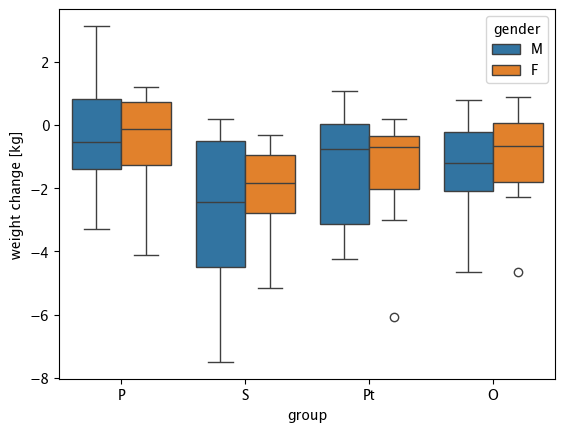

In [3]:

sb.boxplot(data=D,x='group',y='weight_change',hue='gender') # 3pts for one that shows all four groups (1pt for any barplot)
plt.ylabel('weight change [kg]') # [1pt]

Figure 1. Box plot of weight-change (negative numbers indicating weight loss) for the Placebo (P) and the medical (S, Pt, O) groups. [1pt]

The Semaglutide group shows the largest weight loss [1pt]

Men show a larger weight loss than women [1pt]- given that men and women are not full balanced in the groups, this may induce a bias in the results. [1pt]


## Question 3 (4pts)
It has been shown that the amount of weight loss is usually proportional to the initial weight of the person.

Given this, calculate and report the mean initial weight (`weight_before`) for each of the groups (P, S, Pt, O),

Also report the mean initial weight, split only by gender.

Give this, and the observations from Question 1 amd 2, explain how these group differences could bias your conclusion about which medication is the most effective.

In [4]:
A = D.groupby(['group'])
print(A.weight_before.mean()) # 1pt

group
O     83.999757
P     83.477457
Pt    79.432663
S     82.769868
Name: weight_before, dtype: float64


In [5]:
A = D.groupby(['gender'])
print(A.weight_before.mean()) # 1pt

gender
F    76.291407
M    88.207992
Name: weight_before, dtype: float64



Men have a larger initial weight than women. This could be relevant because the weight loss is often proportional to the initial weight. If there are more women in the Pt group, we likely underestimate weight loss effect in this group.

The initial weight is also lowest in that group, which again could lead to an underestimation of the effect of the Pt medication.
(eitehr of these two points is enough for full credit) [2pts]

## Question 4 (3pt)

Based on your insights from Question 1-3, suggest a way of avoiding a bias when you try to estimate the mean effect of the medication.
Without having to redo the study and collect new data, how could you address this issue in the analysis? Describe your approach in a few sentences. [2pts]

To address this issue without collecting new data, we could calculate the average weight loss for each group and gender seperately, and then calcualte the average weight across the two genders. This basically re-weights the observation in each group.

Alternatively, we could expresss the weight loss as a percentage of the initial weight, which would account for the differences in initial weight across the genders.  

Either answer would be fine [3pts]

## Question 5 [5pts]
Calculate and report the dropout rates for the four groups.

Written answer: What could could the dropout rates you observed mean? How may this influence you conclusion from the study?

In [6]:
# Calculates and report  for the the four groups.
D['dropout'] = D.weight_change.isna() # [2pt]
observed = pd.crosstab(D.group,D.dropout,margins=True)
print(observed) # [1pt]


dropout  False  True  All
group                    
O           33     2   35
P           34     1   35
Pt          30     5   35
S           32     3   35
All        129    11  140


The dropout rates are highest in the Pt group. This could indicate that this medication has more unpleasant side effects than the others. 
This means this medication may be less suitable for being approved for general use. [2pt]

## Question 6 (5pts)
Write a function that calculates and the Chi2-square value for the difference between the observed dropout rate and the expected dropout rate across groups, assuming that the dropout is independent of the medication group.  

In [7]:
def calcX2(D,rows='group',cols='dropout'):
    observed = pd.crosstab(D[rows],D[cols], margins=True)
    expected = np.outer(observed["All"][0:-1], observed.loc["All"][0:-1]) /observed['All']['All']
    observed = pd.crosstab(D[rows],D[cols],margins=False)
    return sum(sum((observed.values-expected)**2/expected))

calcX2(D)

np.float64(3.4531360112755465)

# Question 7 (5pts)
Using the function from Q4, test the hypothesis that the dropout rates are the same for all groups (use a permutation test).
What is your null hypothesis and what is your conclusion?

In [8]:
# Helper function:
def randomize_column(df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

# Randomization test function
def randomization_test(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S= randomize_column(D,shuffle)
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')
    plt.xlabel('Chi-squared value')
    plt.ylabel('Frequency')

    # 5. determine p-value (one sided) with rejection region above the threshold
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    if sides==-1:
        p=sum(listOfTS<=realTS)/len(listOfTS)
    # 5. determine p-value (two sided) with rejection region outside the threshold

    print(' P-value of the randomisation test is p = ',p)
    return p

#[1pt] for correct functoin

The Null hypothesis is that the dropout rates are the same across all groups. (or indepenent of the group). [1pt]

 P-value of the randomisation test is p =  0.301


np.float64(0.301)

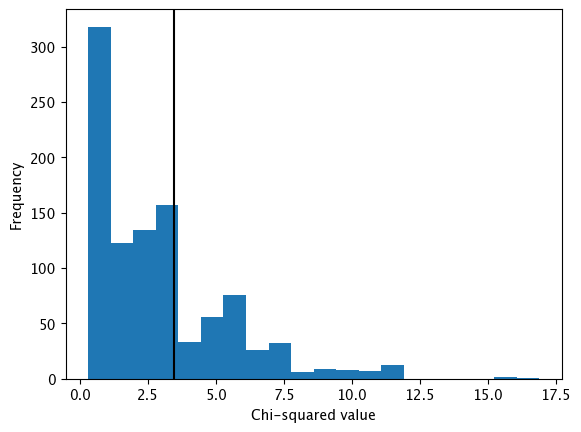

In [9]:
randomization_test(D,calcX2,'group',numIterations=1000,sides=1,nbins=20) # [1pt] for valid p-value

Caption. Distribution of the Chi2-square values for the difference between the observed and expected dropout rates under the null hypothesis that the dropout rate is independent of the medication group. [Figure + Caption 1pt]

Based on the results of the permutation test, we can reject he null hypothesis that the dropout rates are the same for all groups.
The differences in dropout rates is likely depends on the medication.  [1pt]

## Question 8 (4pt)
Write a function that calculates the difference in the median of one of the groups and the median of the placebo group. The group of interest should be an optional input parameter of the function, with the default value of 'S'. Report the median difference for all three groups (S, Pt, O) compared to the placebo group rounded to 3 decimal places.

Written answer: Which group shows the largest difference?

In [10]:
def median_difference(D,group='S'):  # Use Function to calculate the mean difference (1pts)
    a = np.nanmedian(D.weight_change[D.group==group])
    b = np.nanmedian(D.weight_change[D.group=='P'])
    return a-b

In [11]:
# correct median different [1pt each]
a = median_difference(D,'S')
b = median_difference(D,'Pt')
c = median_difference(D,'O')
print (f'the median difference between S and P is {a:.3f}')
print (f'the median difference between Pt and P is {b:.3f}')
print (f'the median difference between O and P is {c:.3f}')

the median difference between S and P is -1.780
the median difference between Pt and P is -0.417
the median difference between O and P is -0.829


The Semaglutide group shows the largest difference in median weight loss compared to the placebo group.

## Question 9 (5pts)
Conduct a permutation test to test the hypothesis that the median weight loss in the Semaglutide group is larger than the Placebo group.
Your code should produce a figure that shows the distribution of the chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis labels and a caption.

Written answer: Report the value of the statistics and the associated p-value, using at least 5000 iterations. What do you conclude regarding the hypothesis formulated above, using a significance threshold of p=0.05?

 P-value of the randomisation test is p =  0.0


np.float64(0.0)

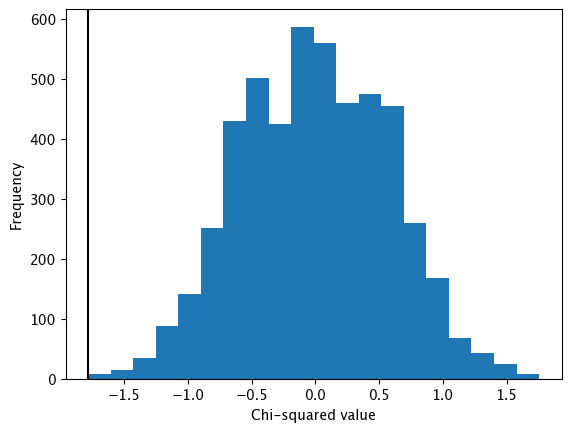

In [12]:
randomization_test(D,median_difference,'group',numIterations=5000,sides=-1,nbins=20) # 2 pts for test, 1 pt for the correct p-value read off the left tail! [3pts]

Caption: Distribution of the difference in median weight loss between the Semaglutide and Placebo group under the null hypothesis that the median weight loss is the same in the two groups. Line shows observed value [1pt].

Based on the permutation test, we conclude that the median weight loss between the Semaglutide group is larger than the median weight loss in the Placebo group. [1pt]

## Question 10 (10pts)
We are coming back to Question 9 and on the closed-book exam:
Here we wanted to establish the average effect size (median weight loss difference per month) for Semaglutide vs. Placebo group with confidence interval. You hopefully recommended to perform a bootstrap as opposed to a randomization test. The correct approach here is to resample data for each group separately, each time calculating the median difference between the two bootstrap groups. Write a bootstrap function that achieves this goal.
Plot the histogram on the bootstrap estimates of the median difference. Remember to provide X and Y label and caption. Report the 95% confidence interval for the median difference in weight loss between the Semaglutide and Placebo group. Show the CI in your plot.

Written answer: How would the CI change if we conducted a bootstrap on the Semaglutide only, and each time subtract the median of the real (non-boostrapped) Placebo group? Why would this not the the correct approach?  

In [13]:
def bootstrap_med(data, numIter = 1000):
    stats = np.array(range(numIter), dtype = 'float64') ## initializing the stats array (the function output)
    data_p = data.weight_change[data.group=='P']
    data_s = data.weight_change[data.group=='S']
    for i in range(numIter):
        sample_p=np.random.choice(data_p,data_p.shape[0], replace = True)
        sample_s=np.random.choice(data_s,data_s.shape[0], replace = True)
        stats[i]=np.nanmedian(sample_s)-np.nanmedian(sample_p)
    return stats

def confidenceInt(data, prec):
    lp = (100 - prec)/2
    Int = [np.percentile(data, lp), np.percentile(data, 100-(lp/2))]
    return Int

# [3pts] - 1pt for overall bootstrap, 1pt for correct sampling from both groups, 1pt for the confidence interval function (2-sided)

In [14]:
boostrap = bootstrap_med(D, numIter = 1000)

Text(0, 0.5, 'Frequency')

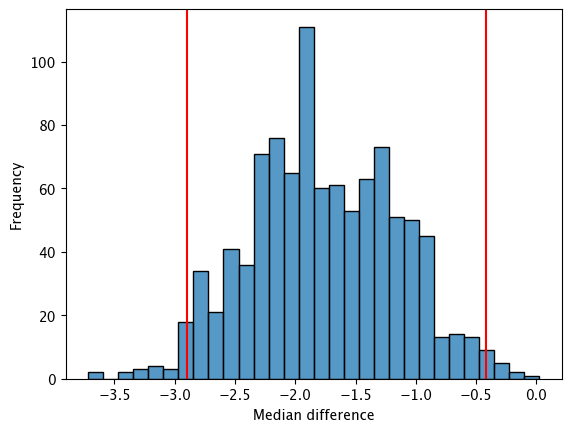

In [15]:
sb.histplot(boostrap, bins = 30)
CI = confidenceInt(boostrap, 95)
plt.axvline(CI[0], color = 'r')
plt.axvline(CI[1], color = 'r')
plt.xlabel('Median difference')
plt.ylabel('Frequency')
# [3pts for correct histogram, Labels, confidence interval]

In [16]:
print(f"The 95% confidence interval for the median difference in weight loss between the Semaglutide and Placebo group is [{CI[0]:.3f}, {CI[1]:.3f}]") # [1pt]

The 95% confidence interval for the median difference in weight loss between the Semaglutide and Placebo group is [-2.902, -0.419]


If we conducted a bootstrap analysis on the Semaglutide group only, we would get a narrowed CI. [2pts] We would not account for the variability induced into the estimate by the sampling of the Placebo group. This would lead to an underestimation of the uncertainty in the estimate of the median difference. [1pt]

In [22]:
def diff(D, group=0):
    a = np.mean(D.weight_change[D.group==group])
    b = np.mean(D.weight_change[D.group==group])
    return a-b
    

diff(D['weight_change'], D['group'])

AttributeError: 'Series' object has no attribute 'weight_change'